# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

# Exercicio 1. (0.5 pontos)

Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados

**RESPOSTA** (VALE 0.5 pontos): Quais as variaveis que influenciam no preço da venda?
O tamanho da casa é um grande correlação com o preço?

# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar?

**RESPOSTA** (VALE 0.75 pontos): (responda aqui, dê dois cliques para editar)

In [2]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
casa = pd.read_csv(r'/home/gustavo/Área de Trabalho/Proj notebooks/Blue-Dados-Modulo2-projetos/projeto_01/kc_house_data.csv')

In [4]:
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Tratando a data
casa['date'] = casa['date'].str.replace('T000000','')
casa['date'] = pd.to_datetime(casa['date'])

In [6]:
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
casa['anos_construção'] = -casa['yr_built'] + casa['date'].dt.year


In [22]:
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,anos_construção
0,7129300520,2014-10-13,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,...,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,59
1,6414100192,2014-12-09,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,...,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,63
2,5631500400,2015-02-25,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,...,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,82
3,2487200875,2014-12-09,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,...,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,49
4,1954400510,2015-02-18,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,...,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,28


In [42]:
array_yrenove = np.array(casa['yr_renovated'])
array_date = np.array(casa['date'].dt.year)

lista_ano_reforma = []

for i in range(0,len(array_yrenove)):
    if array_yrenove[i] == 0:
        lista_ano_reforma.append(0)
    else:
        lista_ano_reforma.append(array_date[i]-array_yrenove[i])



In [44]:
casa['ano_reform'] = lista_ano_reforma

In [7]:
# Convertendo pés quadrados em metros quadrados
casa['sqft_living'] = casa['sqft_living']*0.09290304
casa['sqft_lot'] = casa['sqft_lot']*0.09290304
casa['sqft_above'] = casa['sqft_above']*0.09290304
casa['sqft_basement'] = casa['sqft_basement']*0.09290304
casa['sqft_living15'] = casa['sqft_living15']*0.09290304
casa['sqft_lot15'] = casa['sqft_lot15']*0.09290304

In [45]:
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,anos_construção,ano_reform
0,7129300520,2014-10-13,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,...,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,...,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,63,23
2,5631500400,2015-02-25,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,...,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,...,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,...,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,28,0


In [46]:
casa.drop(['date','yr_built','yr_renovated'],axis=1,inplace=True)

Vamos ver a correlação para verificar as variáveis que podem infuenciar no preço da casa.


In [47]:
casa.corr()['price']

id                -0.016762
price              1.000000
bedrooms           0.308350
bathrooms          0.525138
sqft_living        0.702035
sqft_lot           0.089661
floors             0.256794
waterfront         0.266369
view               0.397293
condition          0.036362
grade              0.667434
sqft_above         0.605567
sqft_basement      0.323816
zipcode           -0.053203
lat                0.307003
long               0.021626
sqft_living15      0.585379
sqft_lot15         0.082447
anos_construção   -0.053951
ano_reform         0.067177
Name: price, dtype: float64

Podemos ver que as variaveis que mais influencia são a sqft_living,a grade, e a sqft_above, jogaremos em um grafico de dispersão para verificar.

In [10]:
px.scatter(casa,x='sqft_living',y='price',title='Grafico de dispersão da área da casa pelo preço',
labels = {'sqft_living':'Área da casa','price':'Preço'})

In [12]:
px.scatter(casa,x='sqft_above',y='price',title='Grafico de dispersão da área debaixo casa pelo preço',
labels = {'sqft_living':'Área','price':'Preço'})

In [13]:
px.scatter(casa,x='grade',y='price',title='Grafico de dispersão da nota de qualidade da casa pelo preço',
labels = {'grade':'Nota de qualidade','price':'Preço'})

A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

**RESPOSTA** (VALE 0.75 pontos): Respondeu que há uma correlação entre a área e o preço da casa, indicando uma boa correlação.

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [14]:
#### (VALE 0.75 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

n_linhas = np.shape(casa)[0]
n_colunas = np.shape(casa)[1]
media = np.mean(casa['sqft_living'])
mediana = np.median(casa['sqft_living'])
pri_q = np.percentile(casa['sqft_living'],25,interpolation='midpoint')
ter_q = np.percentile(casa['sqft_living'],75,interpolation='midpoint')

/tmp/ipykernel_62476/2606169909.py:8: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

/tmp/ipykernel_62476/2606169909.py:9: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



In [15]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print('Existem {} observações no conjunto de dados'.format(n_linhas))
print('Existem {} variaveis no conjunto de dados'.format(n_colunas))
print('O tamanho médio das casa é de {:.2f} metros quadrados'.format(media))
print('A mediana do tamanho das casas é de {:.2f} metros quadrados'.format(mediana))

# Quartis
print('primeiro quartil {:.2f} do tamanho das casas'.format(pri_q))
print('terceiro quartil {:.2f} do tamanho das casas'.format(ter_q))

Existem 21613 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados
O tamanho médio das casa é de 193.23 metros quadrados
A mediana do tamanho das casas é de 177.44 metros quadrados
primeiro quartil 132.57 do tamanho das casas
terceiro quartil 236.90 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

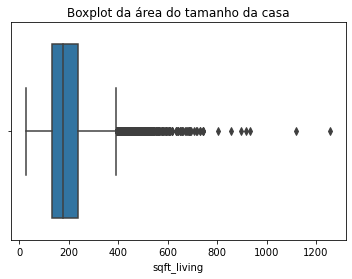

In [16]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

plt.title('Boxplot da área do tamanho da casa')
sns.boxplot(x='sqft_living',data=casa);


Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

**RESPOSTA** (VALE 0.75 pontos): Sim, acima do esperado como mostrado na figura acima

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [48]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import statsmodels.api as sm

x1 = casa.drop(['id','price','zipcode'],axis=1)
y1 = casa.price

mod = sm.OLS(y1,x1)

res = mod.fit()

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [49]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          1.221e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:54:57   Log-Likelihood:                     -2.9512e+05
No. Observations:               21613   AIC:                                  5.903e+05
Df Residuals:                   21597   BIC:                                  5.904e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Faça outro modelo usando a biblioteca **sklearn**.

In [50]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
x2 = casa.drop(['id','price','zipcode'],axis=1)
y2 = casa.price
x2_std = StandardScaler().fit_transform(x2)


In [52]:
x_treino, x_teste, y_treino,y_teste = train_test_split(x2,y2,test_size=0.3,random_state=10)

In [53]:
linea_r = LinearRegression()
linea_r.fit(x_treino,y_treino)

LinearRegression()

In [54]:
y2_pred = linea_r.predict(x_teste)

Qual o valor de ${R}^{2}$ e $MAE$ obtido?

**RESPOSTA** (VALE 0.5 pontos): 

In [55]:
print(f'O R2 é {r2_score(y_teste,y2_pred):.2f} e o MAE é {mean_absolute_error(y_teste,y2_pred):.2f}.')

O R2 é 0.70 e o MAE é 123698.87.


Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [35]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

from sklearn.feature_selection import RFE

In [36]:
x3 = casa.drop(['date','price'],axis=1)
y3 = casa.price

In [37]:
estimator = LinearRegression()
select = RFE(estimator, n_features_to_select=5, step=1)
select = select.fit(x3, y3)

In [38]:
select.get_feature_names_out()

array(['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat'],
      dtype=object)

Quais são as 5 variaveis mais importantes deste conjunto de dados?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

In [39]:
print(f'As cinco mais importantes são: {select.get_feature_names_out()}')

As cinco mais importantes são: ['sqft_living' 'waterfront' 'sqft_above' 'sqft_basement' 'lat']


Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

In [40]:
xs = casa[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']]
ys = casa.price

In [41]:
xs_std = StandardScaler().fit_transform(xs)

In [42]:
xs_treino,xs_teste,ys_treino,ys_teste = train_test_split(xs_std,ys,test_size=0.2)

In [43]:
lr2 = LinearRegression()
lr2.fit(xs_treino,ys_treino)
ys_pred = lr2.predict(xs_teste)

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

In [44]:
print(f'O R2 é igual a {r2_score(ys_teste,ys_pred):.2f}, e o MAE é igual a {mean_absolute_error(ys_teste,ys_pred):.2f}')

O R2 é igual a 0.60, e o MAE é igual a 148218.93
